# **Installing the pip package for quantile forest**

In [1]:
!pip install quantile-forest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.0 MB/s eta 0:00:00


# **Import required libraries**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from quantile_forest import RandomForestQuantileRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# **Load sample dataset**

In [3]:

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# **Split the data into training and test sets**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Train Quantile Random Forest model**

In [5]:
qrf = RandomForestQuantileRegressor(random_state=42, n_estimators=100)
qrf.fit(X_train, y_train)

RandomForestQuantileRegressor(random_state=42)

# **Make predictions at different quantiles**

In [6]:
quantiles = [0.1, 0.5, 0.9]
predictions = qrf.predict(X_test, quantiles=quantiles)

# **Display the quantile predictions**

In [7]:
pred_df = pd.DataFrame({
    '10th percentile': predictions[:, 0],
    '50th percentile (Median)': predictions[:, 1],
    '90th percentile': predictions[:, 2],
    'Actual': y_test
})
print(pred_df.head())

   10th percentile  50th percentile (Median)  90th percentile   Actual
0           0.4150                   0.47900          0.59010  0.47700
1           0.5210                   0.69300          1.00580  0.45800
2           4.8751                   5.00001          5.00001  5.00001
3           1.9270                   2.49900          3.21760  2.18600
4           1.6910                   2.25700          2.64000  2.78000


# **Calculate Mean Squared Error for median predictions (50th percentile)**

In [8]:
mse = mean_squared_error(y_test, predictions[:, 1])
print(f"Mean Squared Error (Median): {mse}")


Mean Squared Error (Median): 0.2619077324047601


# **Plot predictions vs actual values for the median**

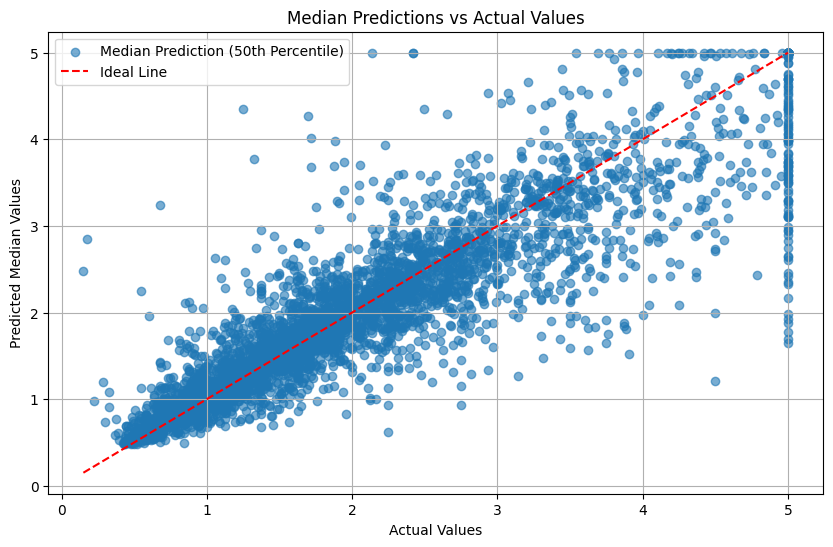

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions[:, 1], alpha=0.6, label='Median Prediction (50th Percentile)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
plt.title('Median Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Median Values')
plt.legend()
plt.grid(True)
plt.show()

# **Plot prediction intervals (10th to 90th percentile) vs actual values**

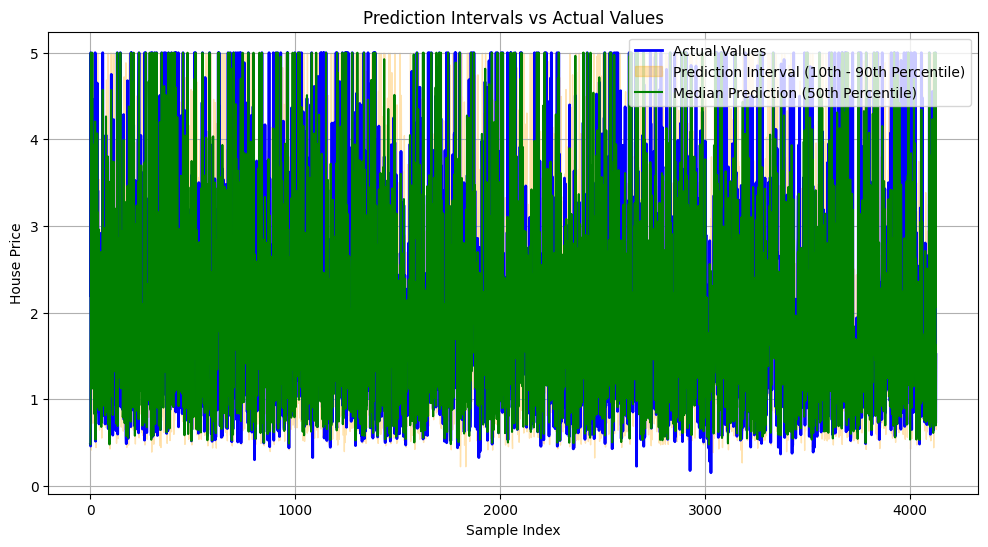

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue', linewidth=2)
plt.fill_between(np.arange(len(y_test)), predictions[:, 0], predictions[:, 2], color='orange', alpha=0.3, label='Prediction Interval (10th - 90th Percentile)')
plt.plot(predictions[:, 1], color='green', linestyle='-', label='Median Prediction (50th Percentile)')
plt.title('Prediction Intervals vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.show()

## **Histogram of residuals (errors) between median predictions and actual values**

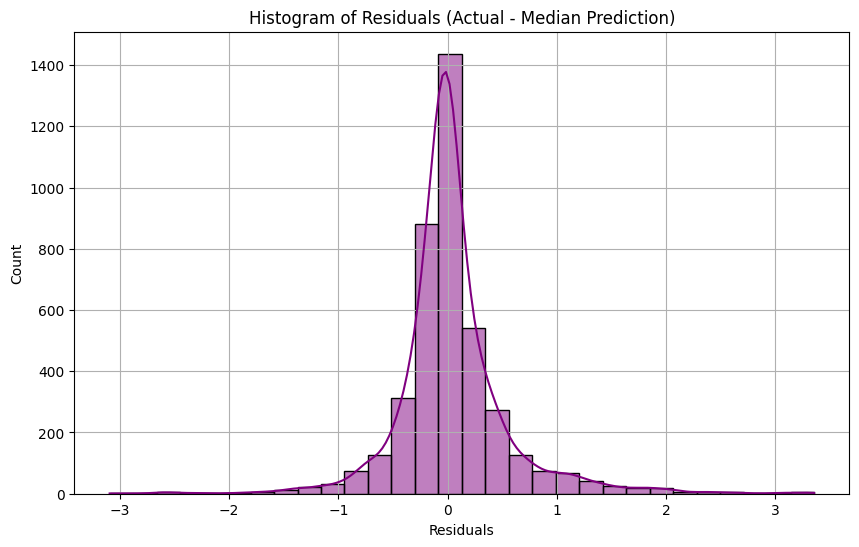

In [11]:

residuals = y_test - predictions[:, 1]
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title('Histogram of Residuals (Actual - Median Prediction)')
plt.xlabel('Residuals')
plt.grid(True)
plt.show()


## **Boxplot showing the spread of predictions at different percentiles**

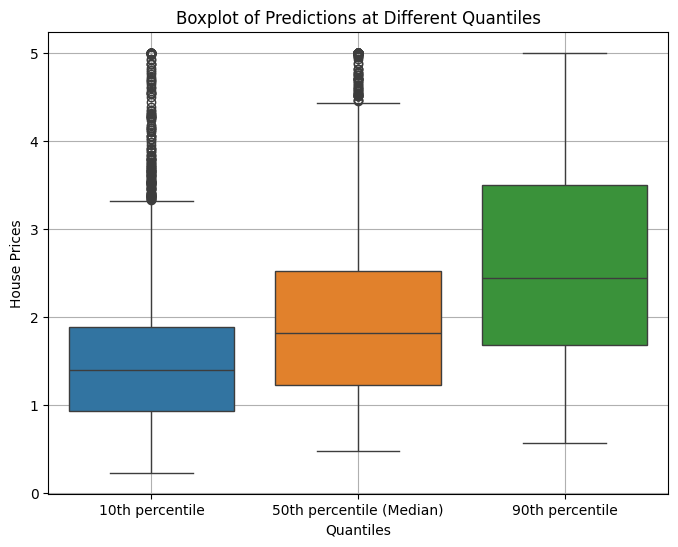

In [12]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=pred_df[['10th percentile', '50th percentile (Median)', '90th percentile']])
plt.title('Boxplot of Predictions at Different Quantiles')
plt.xlabel('Quantiles')
plt.ylabel('House Prices')
plt.grid(True)
plt.show()